# Apprentissage automatique pour les séries temporelles 
## Binôme 13 : Supervised kernel change point detection with partial annotations.
### Notebook 3/3 : Illustration de l'implémentation via Ruptures : Illustration sur le jeu de donnnées Gait

In [1]:
import itertools
import os
import random
from dataclasses import dataclass

import matplotlib.pyplot as plt  # for display purposes
import numpy as np
import ruptures as rpt
import tqdm
from path import Path
from ruptures.metrics import hausdorff, precision_recall
from scipy.spatial.distance import pdist, squareform
from sklearn.gaussian_process import kernels

In [2]:
from loadmydata.load_human_locomotion import get_code_list, load_human_locomotion_dataset

In [3]:
curr_path = Path(os.getcwd())
os.chdir(curr_path.paren

In [5]:
os.chdir(path_to_kernel_change_point_detection)
from src.cost import KernelWithPartialAnnotationCost
from src.utils import compute_f1, create_labels

# Utility functions

In [6]:
SEARCH_METHODS = {"dynp": rpt.Dynp, "window": rpt.Window}

In [84]:
def evaluate(cost, signals, bkps_list, prefix, search_method, n_bkps):
    hausdorff_score = []
    f1_score = []
    for i in range(1):
        if(search_method=="dynp"):
            algo = SEARCH_METHODS[search_method](custom_cost=cost, min_size=3, jump=20).fit(signals[i])
        else:
            algo = SEARCH_METHODS[search_method](custom_cost=cost, min_size=3, jump=20).fit(signals[i])
  
        bkps_predicted = algo.predict(n_bkps=n_bkps)

        hausdorff_score.append(hausdorff(bkps_predicted, bkps_list[i]))
        precision, recall = precision_recall(bkps_list[i], bkps_predicted)
        f1_score.append(compute_f1(precision, recall))

    hausdorff_score = np.mean(hausdorff_score)
    f1_score = np.mean(f1_score)

    fig, ax_array = rpt.display(signals[-1][:,0], bkps_list[-1], bkps_predicted)

    print(f"{prefix}_hausdorff: {hausdorff_score:.3f}\n" f"{prefix}_f1: {f1_score:.3f}\n")
    plt.show()

## Creation

In [35]:
signals_train = []
bkps_train = []
    
for i in range(9,10):
    print(i)
    code_list = get_code_list()
    code = code_list[i]  # On choisit le 9eme signal sur les 1020 !
    data = load_human_locomotion_dataset(code)

    dernier=data.left_steps.ravel()[-1]
    signal= np.array(data.signal)[:dernier,:]
    bkps=data.left_steps.ravel()
    signals_train.append(signal)
    bkps_train.append(bkps)
    
labels_train=create_labels(bkps_train, annotation_ratio=0.15)

code_list = get_code_list()
code = code_list[11]  # On choisit le 11eme signal sur les 1020 !
test = load_human_locomotion_dataset(code)

signals_test = []
bkps_test = []
for i in range(1):
    dernier=test.left_steps.ravel()[-1]
    signal= np.array(test.signal)[:dernier,:]
    bkps=test.left_steps.ravel()
    signals_test.append(signal)
    bkps_test.append(bkps)
    
labels_test=create_labels(bkps_test, annotation_ratio=0.15)

9


## Visualization

Fist signal of the dataset

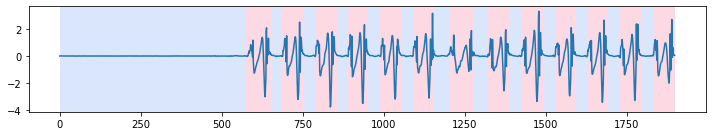

In [36]:
#fig, ax_array = rpt.display(signals_gait[0], bkps_list_gait[0])
fig, ax_array = rpt.display(signals_train[0][:,0], bkps_train[0])

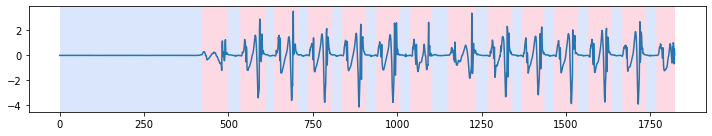

In [37]:
fig, ax_array = rpt.display(signals_test[0][:,0], bkps_test[0])

Corresponding labels

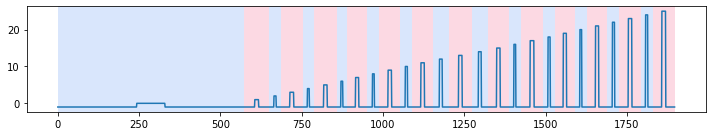

In [38]:
fig, ax_array = rpt.display(labels_train[0], bkps_train[0])

# Change point detection

## Supervised kernel change point detection with partial annotation

In [39]:
@dataclass
class TrainingArgs:
    u: float = 0.1
    l: float = 2.0
    gamma: float = 1.0

In [40]:
training_args = TrainingArgs()

### Initialized with a gaussian kernel

Trained with partial annotations

In [41]:
kernel_init = kernels.RBF(0.1)  # Gaussian
cost = KernelWithPartialAnnotationCost()
cost.pre_fit(signals_train,  labels_train, kernel_init, upper_bound_similarity=training_args.u, lower_bound_dissimilarity=training_args.l, gamma=training_args.gamma)

 14%|█▍        | 66/474 [00:00<00:00, 657.83it/s]

training_samples.shape: (314, 16)
Iteration n°: 1


 18%|█▊        | 85/474 [00:00<00:00, 844.00it/s]

Iteration n°: 2


 18%|█▊        | 86/474 [00:00<00:00, 855.03it/s]

Iteration n°: 3


 20%|█▉        | 93/474 [00:00<00:00, 928.20it/s]

Iteration n°: 4


 17%|█▋        | 80/474 [00:00<00:00, 792.76it/s]

Iteration n°: 5


 21%|██        | 98/474 [00:00<00:00, 974.14it/s]

Iteration n°: 6


 20%|██        | 96/474 [00:00<00:00, 951.92it/s]

Iteration n°: 7


 20%|█▉        | 93/474 [00:00<00:00, 922.37it/s]

Iteration n°: 8


 19%|█▉        | 90/474 [00:00<00:00, 702.86it/s]

Iteration n°: 9


 20%|██        | 96/474 [00:00<00:00, 958.44it/s]

Iteration n°: 10


 15%|█▍        | 69/474 [00:00<00:00, 686.27it/s]

Iteration n°: 11


 21%|██        | 98/474 [00:00<00:00, 978.48it/s]

Iteration n°: 12


 21%|██        | 98/474 [00:00<00:00, 974.29it/s]

Iteration n°: 13


 21%|██        | 98/474 [00:00<00:00, 978.35it/s]

Iteration n°: 14


 18%|█▊        | 84/474 [00:00<00:00, 830.68it/s]

Iteration n°: 15


 21%|██        | 98/474 [00:00<00:00, 971.89it/s]

Iteration n°: 16


 20%|██        | 96/474 [00:00<00:00, 959.56it/s]

Iteration n°: 17


 21%|██        | 98/474 [00:00<00:00, 972.08it/s]

Iteration n°: 18


 14%|█▍        | 66/474 [00:00<00:00, 652.19it/s]

Iteration n°: 19


 15%|█▍        | 71/474 [00:00<00:00, 707.80it/s]

Iteration n°: 20


 21%|██        | 98/474 [00:00<00:00, 974.31it/s]

Iteration n°: 21


 20%|█▉        | 94/474 [00:00<00:00, 938.92it/s]

Iteration n°: 22


 18%|█▊        | 84/474 [00:00<00:00, 834.45it/s]

Iteration n°: 23


 17%|█▋        | 82/474 [00:00<00:00, 817.94it/s]

Iteration n°: 24


 17%|█▋        | 82/474 [00:00<00:00, 818.54it/s]

Iteration n°: 25


 20%|██        | 96/474 [00:00<00:00, 955.36it/s]

Iteration n°: 26


 15%|█▍        | 69/474 [00:00<00:00, 684.50it/s]

Iteration n°: 27


 16%|█▌        | 74/474 [00:00<00:00, 736.15it/s]

Iteration n°: 28


 14%|█▍        | 67/474 [00:00<00:00, 662.41it/s]

Iteration n°: 29


 20%|██        | 97/474 [00:00<00:00, 964.18it/s]

Iteration n°: 30


 18%|█▊        | 85/474 [00:00<00:00, 841.91it/s]

Iteration n°: 31


 17%|█▋        | 79/474 [00:00<00:00, 782.00it/s]

Iteration n°: 32


 21%|██        | 98/474 [00:00<00:00, 977.11it/s]

Iteration n°: 33


 19%|█▉        | 89/474 [00:00<00:00, 889.71it/s]

Iteration n°: 34


 20%|██        | 97/474 [00:00<00:00, 962.43it/s]

Iteration n°: 35


 16%|█▌        | 77/474 [00:00<00:00, 769.43it/s]

Iteration n°: 36


 19%|█▉        | 92/474 [00:00<00:00, 917.19it/s]

Iteration n°: 37


 13%|█▎        | 61/474 [00:00<00:00, 609.00it/s]

Iteration n°: 38


 21%|██        | 99/474 [00:00<00:00, 983.38it/s]

Iteration n°: 39


 15%|█▌        | 73/474 [00:00<00:00, 723.58it/s]

Iteration n°: 40


 34%|███▍      | 160/474 [00:00<00:00, 808.41it/s]

Iteration n°: 41


 21%|██        | 99/474 [00:00<00:00, 980.78it/s]

Iteration n°: 42


 18%|█▊        | 86/474 [00:00<00:00, 858.54it/s]

Iteration n°: 43


 19%|█▊        | 88/474 [00:00<00:00, 879.27it/s]

Iteration n°: 44


 40%|████      | 191/474 [00:00<00:00, 958.39it/s]

Iteration n°: 45


 20%|██        | 96/474 [00:00<00:00, 952.36it/s]

Iteration n°: 46


 16%|█▌        | 76/474 [00:00<00:00, 756.28it/s]

Iteration n°: 47


 20%|██        | 97/474 [00:00<00:00, 967.34it/s]

Iteration n°: 48


 15%|█▌        | 73/474 [00:00<00:00, 723.02it/s]

Iteration n°: 49


 15%|█▌        | 72/474 [00:00<00:00, 719.18it/s]

Iteration n°: 50


 16%|█▌        | 74/474 [00:00<00:00, 739.13it/s]

Iteration n°: 51


 15%|█▌        | 72/474 [00:00<00:00, 719.78it/s]

Iteration n°: 52


 25%|██▌       | 120/474 [00:00<00:00, 598.82it/s]

Iteration n°: 53


 18%|█▊        | 85/474 [00:00<00:00, 845.07it/s]

Iteration n°: 54


 15%|█▌        | 73/474 [00:00<00:00, 720.12it/s]

Iteration n°: 55


 18%|█▊        | 87/474 [00:00<00:00, 868.95it/s]

Iteration n°: 56


 15%|█▍        | 70/474 [00:00<00:00, 698.23it/s]

Iteration n°: 57


 20%|██        | 97/474 [00:00<00:00, 958.71it/s]

Iteration n°: 58


 21%|██        | 99/474 [00:00<00:00, 981.07it/s]

Iteration n°: 59


 21%|██        | 98/474 [00:00<00:00, 977.84it/s]

Iteration n°: 60


 21%|██▏       | 101/474 [00:00<00:00, 1004.08it/s]

Iteration n°: 61


 16%|█▌        | 75/474 [00:00<00:00, 746.42it/s]

Iteration n°: 62


 21%|██▏       | 101/474 [00:00<00:00, 1005.79it/s]

Iteration n°: 63


 15%|█▍        | 69/474 [00:00<00:00, 683.78it/s]

Iteration n°: 64


 16%|█▌        | 75/474 [00:00<00:00, 743.65it/s]

Iteration n°: 65


 20%|██        | 95/474 [00:00<00:00, 940.93it/s]

Iteration n°: 66


 19%|█▉        | 89/474 [00:00<00:00, 881.08it/s]

Iteration n°: 67


 21%|██        | 98/474 [00:00<00:00, 977.99it/s]

Iteration n°: 68


 21%|██        | 99/474 [00:00<00:00, 983.69it/s]

Iteration n°: 69


 21%|██        | 99/474 [00:00<00:00, 981.71it/s]

Iteration n°: 70


 21%|██        | 98/474 [00:00<00:00, 977.78it/s]

Iteration n°: 71


 21%|██▏       | 101/474 [00:00<00:00, 1008.21it/s]

Iteration n°: 72


 15%|█▍        | 70/474 [00:00<00:00, 699.47it/s]

Iteration n°: 73


 13%|█▎        | 61/474 [00:00<00:00, 607.83it/s]

Iteration n°: 74


 20%|█▉        | 93/474 [00:00<00:00, 929.63it/s]

Iteration n°: 75


 25%|██▌       | 119/474 [00:00<00:00, 595.76it/s]

Iteration n°: 76


 17%|█▋        | 82/474 [00:00<00:00, 818.28it/s]

Iteration n°: 77


 12%|█▏        | 58/474 [00:00<00:00, 573.20it/s]

Iteration n°: 78


 20%|██        | 97/474 [00:00<00:00, 960.03it/s]

Iteration n°: 79


 21%|██        | 98/474 [00:00<00:00, 975.96it/s]

Iteration n°: 80


 19%|█▉        | 89/474 [00:00<00:00, 889.94it/s]

Iteration n°: 81


 35%|███▌      | 167/474 [00:00<00:00, 839.84it/s]

Iteration n°: 82


 20%|█▉        | 94/474 [00:00<00:00, 931.73it/s]

Iteration n°: 83


 21%|██        | 99/474 [00:00<00:00, 980.17it/s]

Iteration n°: 84


 20%|██        | 97/474 [00:00<00:00, 968.98it/s]

Iteration n°: 85


 20%|██        | 96/474 [00:00<00:00, 956.35it/s]

Iteration n°: 86


 21%|██        | 99/474 [00:00<00:00, 981.69it/s]

Iteration n°: 87


 21%|██        | 99/474 [00:00<00:00, 981.48it/s]

Iteration n°: 88


 20%|██        | 97/474 [00:00<00:00, 963.08it/s]

Iteration n°: 89


 20%|██        | 97/474 [00:00<00:00, 967.38it/s]

Iteration n°: 90


 12%|█▏        | 59/474 [00:00<00:00, 586.44it/s]

Iteration n°: 91


 20%|██        | 96/474 [00:00<00:00, 954.41it/s]

Iteration n°: 92


 20%|██        | 96/474 [00:00<00:00, 953.77it/s]

Iteration n°: 93


 20%|██        | 97/474 [00:00<00:00, 964.00it/s]

Iteration n°: 94


 20%|██        | 97/474 [00:00<00:00, 960.50it/s]

Iteration n°: 95


 18%|█▊        | 83/474 [00:00<00:00, 821.80it/s]

Iteration n°: 96


 20%|██        | 96/474 [00:00<00:00, 957.68it/s]

Iteration n°: 97


 20%|██        | 96/474 [00:00<00:00, 951.06it/s]

Iteration n°: 98


 19%|█▊        | 88/474 [00:00<00:00, 875.60it/s]

Iteration n°: 99


 19%|█▊        | 88/474 [00:00<00:00, 879.09it/s]

Iteration n°: 100


 18%|█▊        | 84/474 [00:00<00:00, 835.94it/s]

Iteration n°: 101


 21%|██▏       | 101/474 [00:00<00:00, 1001.43it/s]

Iteration n°: 102


 21%|██        | 98/474 [00:00<00:00, 971.09it/s]

Iteration n°: 103


 21%|██▏       | 101/474 [00:00<00:00, 1003.96it/s]

Iteration n°: 104


 20%|█▉        | 94/474 [00:00<00:00, 932.21it/s]

Iteration n°: 105


 21%|██        | 99/474 [00:00<00:00, 985.23it/s]

Iteration n°: 106


 20%|██        | 97/474 [00:00<00:00, 966.03it/s]

Iteration n°: 107


 20%|██        | 97/474 [00:00<00:00, 968.15it/s]

Iteration n°: 108


 14%|█▎        | 64/474 [00:00<00:00, 632.99it/s]

Iteration n°: 109


 21%|██        | 99/474 [00:00<00:00, 984.30it/s]

Iteration n°: 110


 18%|█▊        | 86/474 [00:00<00:00, 851.40it/s]

Iteration n°: 111


 17%|█▋        | 82/474 [00:00<00:00, 815.88it/s]

Iteration n°: 112


 15%|█▌        | 73/474 [00:00<00:00, 718.28it/s]

Iteration n°: 113


 13%|█▎        | 60/474 [00:00<00:00, 599.50it/s]

Iteration n°: 114


 18%|█▊        | 85/474 [00:00<00:00, 843.08it/s]

Iteration n°: 115


 15%|█▌        | 73/474 [00:00<00:00, 721.04it/s]

Iteration n°: 116


 20%|██        | 97/474 [00:00<00:00, 964.74it/s]

Iteration n°: 117


 20%|██        | 96/474 [00:00<00:00, 958.39it/s]

Iteration n°: 118


 21%|██        | 98/474 [00:00<00:00, 974.05it/s]

Iteration n°: 119


 20%|██        | 96/474 [00:00<00:00, 954.79it/s]

Iteration n°: 120


 21%|██        | 99/474 [00:00<00:00, 982.74it/s]

Iteration n°: 121


 14%|█▍        | 67/474 [00:00<00:00, 666.20it/s]

Iteration n°: 122


 21%|██        | 98/474 [00:00<00:00, 978.91it/s]

Iteration n°: 123


 14%|█▍        | 66/474 [00:00<00:00, 650.51it/s]

Iteration n°: 124


 18%|█▊        | 85/474 [00:00<00:00, 843.55it/s]

Iteration n°: 125


 15%|█▍        | 71/474 [00:00<00:00, 709.88it/s]

Iteration n°: 126


 13%|█▎        | 60/474 [00:00<00:00, 595.67it/s]

Iteration n°: 127


 18%|█▊        | 85/474 [00:00<00:00, 848.80it/s]

Iteration n°: 128


 18%|█▊        | 86/474 [00:00<00:00, 849.78it/s]

Iteration n°: 129


 18%|█▊        | 86/474 [00:00<00:00, 859.94it/s]

Iteration n°: 130


 14%|█▍        | 68/474 [00:00<00:00, 676.33it/s]

Iteration n°: 131


 13%|█▎        | 63/474 [00:00<00:00, 628.94it/s]

Iteration n°: 132


 11%|█▏        | 54/474 [00:00<00:00, 531.17it/s]

Iteration n°: 133


 20%|██        | 96/474 [00:00<00:00, 956.98it/s]

Iteration n°: 134


 20%|█▉        | 93/474 [00:00<00:00, 924.34it/s]

Iteration n°: 135


 21%|██        | 98/474 [00:00<00:00, 976.30it/s]

Iteration n°: 136


 21%|██▏       | 101/474 [00:00<00:00, 1004.43it/s]

Iteration n°: 137


 21%|██▏       | 101/474 [00:00<00:00, 1000.38it/s]

Iteration n°: 138


 21%|██        | 99/474 [00:00<00:00, 988.72it/s]

Iteration n°: 139


 17%|█▋        | 82/474 [00:00<00:00, 813.32it/s]

Iteration n°: 140


 21%|██        | 99/474 [00:00<00:00, 985.75it/s]

Iteration n°: 141


 21%|██        | 98/474 [00:00<00:00, 978.08it/s]

Iteration n°: 142


 42%|████▏     | 199/474 [00:00<00:00, 994.72it/s]

Iteration n°: 143


 21%|██▏       | 101/474 [00:00<00:00, 1001.50it/s]

Iteration n°: 144


 21%|██        | 99/474 [00:00<00:00, 987.13it/s]

Iteration n°: 145


 21%|██▏       | 101/474 [00:00<00:00, 1007.42it/s]

Iteration n°: 146


 20%|██        | 97/474 [00:00<00:00, 965.81it/s]

Iteration n°: 147


 21%|██▏       | 101/474 [00:00<00:00, 1004.93it/s]

Iteration n°: 148


 21%|██▏       | 101/474 [00:00<00:00, 1005.05it/s]

Iteration n°: 149


 13%|█▎        | 61/474 [00:00<00:00, 601.90it/s]

Iteration n°: 150


 21%|██        | 98/474 [00:00<00:00, 971.89it/s]

Iteration n°: 151


 21%|██        | 100/474 [00:00<00:00, 998.81it/s]

Iteration n°: 152


 21%|██        | 100/474 [00:00<00:00, 993.10it/s]

Iteration n°: 153


 17%|█▋        | 81/474 [00:00<00:00, 808.89it/s]

Iteration n°: 154


 20%|██        | 97/474 [00:00<00:00, 968.39it/s]

Iteration n°: 155


 21%|██        | 98/474 [00:00<00:00, 971.12it/s]

Iteration n°: 156


 14%|█▍        | 67/474 [00:00<00:00, 669.93it/s]

Iteration n°: 157


 21%|██        | 99/474 [00:00<00:00, 986.30it/s]

Iteration n°: 158


 15%|█▌        | 73/474 [00:00<00:00, 723.34it/s]

Iteration n°: 159


 21%|██        | 99/474 [00:00<00:00, 989.41it/s]

Iteration n°: 160


 20%|█▉        | 93/474 [00:00<00:00, 921.19it/s]

Iteration n°: 161


 21%|██        | 99/474 [00:00<00:00, 989.61it/s]

Iteration n°: 162


 20%|█▉        | 94/474 [00:00<00:00, 935.47it/s]

Iteration n°: 163


 21%|██        | 98/474 [00:00<00:00, 977.98it/s]

Iteration n°: 164


 19%|█▉        | 91/474 [00:00<00:00, 908.62it/s]

Iteration n°: 165


 14%|█▍        | 66/474 [00:00<00:00, 656.29it/s]

Iteration n°: 166


 13%|█▎        | 60/474 [00:00<00:00, 591.14it/s]

Iteration n°: 167


 19%|█▉        | 91/474 [00:00<00:00, 908.71it/s]

Iteration n°: 168


 21%|██        | 98/474 [00:00<00:00, 975.73it/s]

Iteration n°: 169


 20%|██        | 97/474 [00:00<00:00, 964.81it/s]

Iteration n°: 170


 21%|██        | 99/474 [00:00<00:00, 985.02it/s]

Iteration n°: 171


 21%|██        | 98/474 [00:00<00:00, 970.57it/s]

Iteration n°: 172


 18%|█▊        | 85/474 [00:00<00:00, 845.41it/s]

Iteration n°: 173


 21%|██        | 98/474 [00:00<00:00, 979.91it/s]

Iteration n°: 174


 20%|█▉        | 94/474 [00:00<00:00, 936.32it/s]

Iteration n°: 175


 15%|█▍        | 71/474 [00:00<00:00, 704.69it/s]

Iteration n°: 176


 14%|█▎        | 65/474 [00:00<00:00, 640.89it/s]

Iteration n°: 177


 13%|█▎        | 60/474 [00:00<00:00, 596.53it/s]

Iteration n°: 178


 14%|█▍        | 68/474 [00:00<00:00, 678.99it/s]

Iteration n°: 179


 18%|█▊        | 87/474 [00:00<00:00, 869.62it/s]

Iteration n°: 180


 15%|█▍        | 71/474 [00:00<00:00, 701.63it/s]

Iteration n°: 181


 18%|█▊        | 83/474 [00:00<00:00, 822.01it/s]

Iteration n°: 182


 20%|██        | 96/474 [00:00<00:00, 949.02it/s]

Iteration n°: 183


 18%|█▊        | 85/474 [00:00<00:00, 849.52it/s]

Iteration n°: 184


 21%|██        | 100/474 [00:00<00:00, 992.24it/s]

Iteration n°: 185


 21%|██        | 99/474 [00:00<00:00, 989.22it/s]

Iteration n°: 186


 16%|█▌        | 75/474 [00:00<00:00, 748.77it/s]

Iteration n°: 187


 18%|█▊        | 87/474 [00:00<00:00, 865.03it/s]

Iteration n°: 188


 19%|█▊        | 88/474 [00:00<00:00, 874.26it/s]

Iteration n°: 189


 21%|██        | 98/474 [00:00<00:00, 978.99it/s]

Iteration n°: 190


 18%|█▊        | 85/474 [00:00<00:00, 845.15it/s]

Iteration n°: 191


 12%|█▏        | 59/474 [00:00<00:00, 588.23it/s]

Iteration n°: 192


 19%|█▉        | 92/474 [00:00<00:00, 915.82it/s]

Iteration n°: 193


 14%|█▍        | 67/474 [00:00<00:00, 660.25it/s]

Iteration n°: 194


 17%|█▋        | 81/474 [00:00<00:00, 807.23it/s]

Iteration n°: 195


 21%|██        | 98/474 [00:00<00:00, 976.13it/s]

Iteration n°: 196


 16%|█▋        | 78/474 [00:00<00:00, 778.34it/s]

Iteration n°: 197


 12%|█▏        | 59/474 [00:00<00:00, 589.61it/s]

Iteration n°: 198


 12%|█▏        | 58/474 [00:00<00:00, 576.11it/s]

Iteration n°: 199


 10%|█         | 49/474 [00:00<00:00, 485.02it/s]

Iteration n°: 200


 17%|█▋        | 79/474 [00:00<00:00, 787.42it/s]

Iteration n°: 201


 18%|█▊        | 87/474 [00:00<00:00, 868.73it/s]

Iteration n°: 202


 19%|█▉        | 90/474 [00:00<00:00, 891.11it/s]

Iteration n°: 203


 18%|█▊        | 87/474 [00:00<00:00, 863.32it/s]

Iteration n°: 204


 18%|█▊        | 83/474 [00:00<00:00, 825.66it/s]

Iteration n°: 205


 18%|█▊        | 85/474 [00:00<00:00, 839.88it/s]

Iteration n°: 206


 18%|█▊        | 85/474 [00:00<00:00, 849.79it/s]

Iteration n°: 207


 16%|█▋        | 78/474 [00:00<00:00, 773.23it/s]

Iteration n°: 208


 18%|█▊        | 86/474 [00:00<00:00, 855.27it/s]

Iteration n°: 209


 20%|█▉        | 94/474 [00:00<00:00, 932.48it/s]

Iteration n°: 210


 14%|█▍        | 66/474 [00:00<00:00, 649.66it/s]

Iteration n°: 211


 16%|█▋        | 78/474 [00:00<00:00, 773.62it/s]

Iteration n°: 212


 21%|██        | 99/474 [00:00<00:00, 986.15it/s]

Iteration n°: 213


 20%|██        | 96/474 [00:00<00:00, 951.27it/s]

Iteration n°: 214


 21%|██        | 100/474 [00:00<00:00, 992.61it/s]

Iteration n°: 215


 18%|█▊        | 86/474 [00:00<00:00, 853.64it/s]

Iteration n°: 216


 17%|█▋        | 80/474 [00:00<00:00, 798.68it/s]

Iteration n°: 217


 18%|█▊        | 86/474 [00:00<00:00, 853.98it/s]

Iteration n°: 218


 21%|██        | 100/474 [00:00<00:00, 994.37it/s]

Iteration n°: 219


 21%|██        | 99/474 [00:00<00:00, 989.32it/s]

Iteration n°: 220


 18%|█▊        | 84/474 [00:00<00:00, 838.83it/s]

Iteration n°: 221


 17%|█▋        | 80/474 [00:00<00:00, 795.83it/s]

Iteration n°: 222


 17%|█▋        | 81/474 [00:00<00:00, 802.52it/s]

Iteration n°: 223


 37%|███▋      | 174/474 [00:00<00:00, 868.55it/s]

Iteration n°: 224


 17%|█▋        | 79/474 [00:00<00:00, 783.44it/s]

Iteration n°: 225


 20%|██        | 95/474 [00:00<00:00, 944.08it/s]

Iteration n°: 226


 15%|█▌        | 73/474 [00:00<00:00, 720.92it/s]

Iteration n°: 227


 14%|█▎        | 65/474 [00:00<00:00, 645.15it/s]

Iteration n°: 228


 17%|█▋        | 80/474 [00:00<00:00, 799.57it/s]

Iteration n°: 229


 21%|██        | 100/474 [00:00<00:00, 990.76it/s]

Iteration n°: 230


 19%|█▉        | 91/474 [00:00<00:00, 907.63it/s]

Iteration n°: 231


 21%|██        | 98/474 [00:00<00:00, 971.03it/s]

Iteration n°: 232


 18%|█▊        | 86/474 [00:00<00:00, 852.99it/s]

Iteration n°: 233


 21%|██        | 100/474 [00:00<00:00, 996.64it/s]

Iteration n°: 234


 14%|█▍        | 68/474 [00:00<00:00, 679.84it/s]

Iteration n°: 235


 21%|██        | 99/474 [00:00<00:00, 983.97it/s]

Iteration n°: 236


 21%|██        | 100/474 [00:00<00:00, 995.51it/s]

Iteration n°: 237


 21%|██        | 100/474 [00:00<00:00, 991.81it/s]

Iteration n°: 238


 20%|█▉        | 93/474 [00:00<00:00, 921.48it/s]

Iteration n°: 239


 17%|█▋        | 80/474 [00:00<00:00, 792.66it/s]

Iteration n°: 240


 21%|██        | 98/474 [00:00<00:00, 972.07it/s]

Iteration n°: 241


 36%|███▌      | 169/474 [00:00<00:00, 848.30it/s]

Iteration n°: 242


 18%|█▊        | 86/474 [00:00<00:00, 857.94it/s]

Iteration n°: 243


 20%|██        | 96/474 [00:00<00:00, 957.64it/s]

Iteration n°: 244


 21%|██        | 99/474 [00:00<00:00, 983.11it/s]

Iteration n°: 245


 41%|████▏     | 196/474 [00:00<00:00, 980.47it/s]

Iteration n°: 246


 21%|██        | 98/474 [00:00<00:00, 977.07it/s]

Iteration n°: 247


 20%|██        | 97/474 [00:00<00:00, 961.42it/s]

Iteration n°: 248


 21%|██        | 98/474 [00:00<00:00, 976.09it/s]

Iteration n°: 249


 16%|█▌        | 76/474 [00:00<00:00, 755.81it/s]

Iteration n°: 250


 17%|█▋        | 82/474 [00:00<00:00, 816.00it/s]

Iteration n°: 251


 19%|█▉        | 89/474 [00:00<00:00, 882.70it/s]

Iteration n°: 252


 21%|██        | 98/474 [00:00<00:00, 974.43it/s]

Iteration n°: 253


 20%|██        | 96/474 [00:00<00:00, 954.08it/s]

Iteration n°: 254


 21%|██        | 99/474 [00:00<00:00, 983.22it/s]

Iteration n°: 255


 41%|████      | 194/474 [00:00<00:00, 970.34it/s]

Iteration n°: 256


 21%|██        | 98/474 [00:00<00:00, 975.03it/s]

Iteration n°: 257


 20%|██        | 95/474 [00:00<00:00, 945.99it/s]

Iteration n°: 258


 14%|█▍        | 68/474 [00:00<00:00, 676.68it/s]

Iteration n°: 259


 20%|██        | 95/474 [00:00<00:00, 949.23it/s]

Iteration n°: 260


 18%|█▊        | 87/474 [00:00<00:00, 861.49it/s]

Iteration n°: 261


 21%|██        | 98/474 [00:00<00:00, 972.49it/s]

Iteration n°: 262


 20%|██        | 97/474 [00:00<00:00, 960.25it/s]

Iteration n°: 263


 20%|██        | 95/474 [00:00<00:00, 943.22it/s]

Iteration n°: 264


 18%|█▊        | 85/474 [00:00<00:00, 845.16it/s]

Iteration n°: 265


 20%|██        | 97/474 [00:00<00:00, 968.49it/s]

Iteration n°: 266


 20%|██        | 97/474 [00:00<00:00, 967.45it/s]

Iteration n°: 267


 18%|█▊        | 85/474 [00:00<00:00, 849.75it/s]

Iteration n°: 268


 20%|██        | 95/474 [00:00<00:00, 947.26it/s]

Iteration n°: 269


 18%|█▊        | 87/474 [00:00<00:00, 855.57it/s]

Iteration n°: 270


 21%|██        | 98/474 [00:00<00:00, 974.24it/s]

Iteration n°: 271


 20%|█▉        | 93/474 [00:00<00:00, 920.97it/s]

Iteration n°: 272


 20%|██        | 95/474 [00:00<00:00, 947.54it/s]

Iteration n°: 273


 20%|██        | 96/474 [00:00<00:00, 953.07it/s]

Iteration n°: 274


 20%|██        | 95/474 [00:00<00:00, 948.49it/s]

Iteration n°: 275


 19%|█▉        | 91/474 [00:00<00:00, 901.91it/s]

Iteration n°: 276


 20%|██        | 97/474 [00:00<00:00, 964.59it/s]

Iteration n°: 277


 19%|█▉        | 90/474 [00:00<00:00, 893.02it/s]

Iteration n°: 278


 18%|█▊        | 86/474 [00:00<00:00, 856.11it/s]

Iteration n°: 279


 13%|█▎        | 60/474 [00:00<00:00, 591.49it/s]

Iteration n°: 280


 18%|█▊        | 86/474 [00:00<00:00, 855.83it/s]

Iteration n°: 281


 17%|█▋        | 82/474 [00:00<00:00, 811.52it/s]

Iteration n°: 282


 20%|██        | 96/474 [00:00<00:00, 955.12it/s]

Iteration n°: 283


 20%|██        | 95/474 [00:00<00:00, 940.14it/s]

Iteration n°: 284


 20%|██        | 95/474 [00:00<00:00, 943.46it/s]

Iteration n°: 285


 21%|██        | 99/474 [00:00<00:00, 980.94it/s]

Iteration n°: 286


 18%|█▊        | 87/474 [00:00<00:00, 861.27it/s]

Iteration n°: 287


 19%|█▉        | 89/474 [00:00<00:00, 880.41it/s]

Iteration n°: 288


 20%|██        | 96/474 [00:00<00:00, 955.39it/s]

Iteration n°: 289


 20%|██        | 95/474 [00:00<00:00, 946.67it/s]

Iteration n°: 290


 18%|█▊        | 84/474 [00:00<00:00, 832.76it/s]

Iteration n°: 291


 20%|█▉        | 93/474 [00:00<00:00, 745.52it/s]

Iteration n°: 292


 21%|██        | 98/474 [00:00<00:00, 973.46it/s]

Iteration n°: 293


 21%|██        | 98/474 [00:00<00:00, 973.76it/s]

Iteration n°: 294


 21%|██        | 98/474 [00:00<00:00, 972.60it/s]

Iteration n°: 295


 19%|█▊        | 88/474 [00:00<00:00, 870.20it/s]

Iteration n°: 296


 19%|█▉        | 90/474 [00:00<00:00, 890.97it/s]

Iteration n°: 297


 17%|█▋        | 82/474 [00:00<00:00, 818.05it/s]

Iteration n°: 298


 20%|██        | 95/474 [00:00<00:00, 942.63it/s]

Iteration n°: 299


 19%|█▊        | 88/474 [00:00<00:00, 876.90it/s]

Iteration n°: 300


 20%|██        | 96/474 [00:00<00:00, 959.75it/s]

Iteration n°: 301


 20%|██        | 97/474 [00:00<00:00, 961.20it/s]

Iteration n°: 302


 39%|███▉      | 186/474 [00:00<00:00, 931.17it/s]

Iteration n°: 303


 20%|██        | 96/474 [00:00<00:00, 958.90it/s]

Iteration n°: 304


 20%|██        | 97/474 [00:00<00:00, 967.38it/s]

Iteration n°: 305


 19%|█▊        | 88/474 [00:00<00:00, 876.16it/s]

Iteration n°: 306


 20%|█▉        | 94/474 [00:00<00:00, 932.55it/s]

Iteration n°: 307


 21%|██        | 99/474 [00:00<00:00, 980.51it/s]

Iteration n°: 308


 20%|██        | 96/474 [00:00<00:00, 950.57it/s]

Iteration n°: 309


 20%|██        | 96/474 [00:00<00:00, 951.47it/s]

Iteration n°: 310


 21%|██        | 98/474 [00:00<00:00, 977.25it/s]

Iteration n°: 311


 19%|█▉        | 91/474 [00:00<00:00, 896.15it/s]

Iteration n°: 312


 20%|██        | 97/474 [00:00<00:00, 967.39it/s]

Iteration n°: 313


 16%|█▋        | 78/474 [00:00<00:00, 775.33it/s]

Iteration n°: 314


 13%|█▎        | 63/474 [00:00<00:00, 625.44it/s]

Iteration n°: 315


 20%|██        | 96/474 [00:00<00:00, 954.42it/s]

Iteration n°: 316


 21%|██        | 98/474 [00:00<00:00, 971.73it/s]

Iteration n°: 317


 20%|██        | 96/474 [00:00<00:00, 957.82it/s]

Iteration n°: 318


 21%|██        | 98/474 [00:00<00:00, 973.54it/s]

Iteration n°: 319


 20%|██        | 96/474 [00:00<00:00, 955.32it/s]

Iteration n°: 320


 21%|██        | 99/474 [00:00<00:00, 987.41it/s]

Iteration n°: 321


 20%|██        | 96/474 [00:00<00:00, 955.77it/s]

Iteration n°: 322


 19%|█▊        | 88/474 [00:00<00:00, 874.69it/s]

Iteration n°: 323


 14%|█▍        | 66/474 [00:00<00:00, 659.07it/s]

Iteration n°: 324


 21%|██        | 100/474 [00:00<00:00, 993.09it/s]

Iteration n°: 325


 21%|██        | 98/474 [00:00<00:00, 972.58it/s]

Iteration n°: 326


 19%|█▉        | 92/474 [00:00<00:00, 918.86it/s]

Iteration n°: 327


 21%|██        | 99/474 [00:00<00:00, 980.86it/s]

Iteration n°: 328


 20%|██        | 97/474 [00:00<00:00, 963.92it/s]

Iteration n°: 329


 21%|██        | 98/474 [00:00<00:00, 971.03it/s]

Iteration n°: 330


 20%|██        | 96/474 [00:00<00:00, 952.75it/s]

Iteration n°: 331


 20%|██        | 95/474 [00:00<00:00, 947.97it/s]

Iteration n°: 332


 18%|█▊        | 84/474 [00:00<00:00, 835.24it/s]

Iteration n°: 333


 21%|██        | 98/474 [00:00<00:00, 971.59it/s]

Iteration n°: 334


 20%|██        | 97/474 [00:00<00:00, 969.04it/s]

Iteration n°: 335


 19%|█▉        | 92/474 [00:00<00:00, 916.96it/s]

Iteration n°: 336


 18%|█▊        | 86/474 [00:00<00:00, 859.36it/s]

Iteration n°: 337


 19%|█▉        | 91/474 [00:00<00:00, 905.24it/s]

Iteration n°: 338


 21%|██        | 99/474 [00:00<00:00, 979.33it/s]

Iteration n°: 339


 21%|██        | 98/474 [00:00<00:00, 975.27it/s]

Iteration n°: 340


 19%|█▉        | 90/474 [00:00<00:00, 899.30it/s]

Iteration n°: 341


 19%|█▊        | 88/474 [00:00<00:00, 874.85it/s]

Iteration n°: 342


 21%|██        | 98/474 [00:00<00:00, 975.73it/s]

Iteration n°: 343


 20%|██        | 95/474 [00:00<00:00, 946.81it/s]

Iteration n°: 344


 19%|█▉        | 89/474 [00:00<00:00, 881.73it/s]

Iteration n°: 345


 21%|██        | 98/474 [00:00<00:00, 977.48it/s]

Iteration n°: 346


 21%|██        | 98/474 [00:00<00:00, 975.39it/s]

Iteration n°: 347


 21%|██        | 100/474 [00:00<00:00, 994.27it/s]

Iteration n°: 348


 14%|█▍        | 66/474 [00:00<00:00, 654.79it/s]

Iteration n°: 349


 20%|██        | 96/474 [00:00<00:00, 957.43it/s]

Iteration n°: 350


 14%|█▍        | 68/474 [00:00<00:00, 675.16it/s]

Iteration n°: 351


 36%|███▌      | 169/474 [00:00<00:00, 846.58it/s]

Iteration n°: 352


 18%|█▊        | 86/474 [00:00<00:00, 859.07it/s]

Iteration n°: 353


 17%|█▋        | 81/474 [00:00<00:00, 800.22it/s]

Iteration n°: 354


 19%|█▉        | 91/474 [00:00<00:00, 907.94it/s]

Iteration n°: 355


 18%|█▊        | 83/474 [00:00<00:00, 827.06it/s]

Iteration n°: 356


 18%|█▊        | 84/474 [00:00<00:00, 831.43it/s]

Iteration n°: 357


 18%|█▊        | 83/474 [00:00<00:00, 828.26it/s]

Iteration n°: 358


 20%|██        | 95/474 [00:00<00:00, 944.52it/s]

Iteration n°: 359


 20%|█▉        | 94/474 [00:00<00:00, 932.41it/s]

Iteration n°: 360


 18%|█▊        | 83/474 [00:00<00:00, 827.30it/s]

Iteration n°: 361


 20%|█▉        | 94/474 [00:00<00:00, 930.20it/s]

Iteration n°: 362


 18%|█▊        | 87/474 [00:00<00:00, 862.59it/s]

Iteration n°: 363


 11%|█▏        | 54/474 [00:00<00:00, 538.87it/s]

Iteration n°: 364


 16%|█▋        | 78/474 [00:00<00:00, 775.45it/s]

Iteration n°: 365


 18%|█▊        | 87/474 [00:00<00:00, 868.07it/s]

Iteration n°: 366


 20%|██        | 95/474 [00:00<00:00, 946.80it/s]

Iteration n°: 367


 20%|██        | 96/474 [00:00<00:00, 953.74it/s]

Iteration n°: 368


 19%|█▉        | 89/474 [00:00<00:00, 888.18it/s]

Iteration n°: 369


 13%|█▎        | 63/474 [00:00<00:00, 623.47it/s]

Iteration n°: 370


 20%|█▉        | 93/474 [00:00<00:00, 924.22it/s]

Iteration n°: 371


 20%|██        | 96/474 [00:00<00:00, 957.66it/s]

Iteration n°: 372


 21%|██        | 99/474 [00:00<00:00, 982.50it/s]

Iteration n°: 373


 18%|█▊        | 86/474 [00:00<00:00, 853.99it/s]

Iteration n°: 374


 15%|█▌        | 72/474 [00:00<00:00, 718.72it/s]

Iteration n°: 375


 21%|██        | 98/474 [00:00<00:00, 979.15it/s]

Iteration n°: 376


 15%|█▍        | 69/474 [00:00<00:00, 686.63it/s]

Iteration n°: 377


 20%|██        | 95/474 [00:00<00:00, 941.19it/s]

Iteration n°: 378


 13%|█▎        | 63/474 [00:00<00:00, 626.91it/s]

Iteration n°: 379


 18%|█▊        | 87/474 [00:00<00:00, 864.91it/s]

Iteration n°: 380


 19%|█▊        | 88/474 [00:00<00:00, 867.03it/s]

Iteration n°: 381


 21%|██        | 98/474 [00:00<00:00, 975.28it/s]

Iteration n°: 382


 18%|█▊        | 84/474 [00:00<00:00, 838.51it/s]

Iteration n°: 383


 13%|█▎        | 60/474 [00:00<00:00, 595.45it/s]

Iteration n°: 384


 19%|█▉        | 92/474 [00:00<00:00, 914.97it/s]

Iteration n°: 385


 20%|█▉        | 94/474 [00:00<00:00, 934.80it/s]

Iteration n°: 386


 17%|█▋        | 82/474 [00:00<00:00, 815.82it/s]

Iteration n°: 387


 20%|██        | 96/474 [00:00<00:00, 954.48it/s]

Iteration n°: 388


 14%|█▎        | 65/474 [00:00<00:00, 648.77it/s]

Iteration n°: 389


 13%|█▎        | 62/474 [00:00<00:00, 612.43it/s]

Iteration n°: 390


 14%|█▎        | 64/474 [00:00<00:00, 637.12it/s]

Iteration n°: 391


 13%|█▎        | 60/474 [00:00<00:00, 596.27it/s]

Iteration n°: 392


 16%|█▌        | 75/474 [00:00<00:00, 747.46it/s]

Iteration n°: 393


 20%|██        | 97/474 [00:00<00:00, 966.07it/s]

Iteration n°: 394


 39%|███▊      | 183/474 [00:00<00:00, 924.48it/s]

Iteration n°: 395


 21%|██        | 98/474 [00:00<00:00, 977.84it/s]

Iteration n°: 396


 19%|█▊        | 88/474 [00:00<00:00, 879.64it/s]

Iteration n°: 397


 21%|██        | 98/474 [00:00<00:00, 979.51it/s]

Iteration n°: 398


 17%|█▋        | 81/474 [00:00<00:00, 801.80it/s]

Iteration n°: 399


 17%|█▋        | 82/474 [00:00<00:00, 818.40it/s]

Iteration n°: 400


 15%|█▍        | 70/474 [00:00<00:00, 699.37it/s]

Iteration n°: 401


 17%|█▋        | 79/474 [00:00<00:00, 785.87it/s]

Iteration n°: 402


 20%|██        | 96/474 [00:00<00:00, 956.49it/s]

Iteration n°: 403


 20%|██        | 97/474 [00:00<00:00, 961.59it/s]

Iteration n°: 404


 20%|██        | 95/474 [00:00<00:00, 947.95it/s]

Iteration n°: 405


 20%|██        | 96/474 [00:00<00:00, 958.82it/s]

Iteration n°: 406


 19%|█▉        | 92/474 [00:00<00:00, 919.21it/s]

Iteration n°: 407


 18%|█▊        | 87/474 [00:00<00:00, 864.51it/s]

Iteration n°: 408


 20%|██        | 95/474 [00:00<00:00, 941.72it/s]

Iteration n°: 409


 40%|███▉      | 189/474 [00:00<00:00, 946.37it/s]

Iteration n°: 410


 19%|█▉        | 90/474 [00:00<00:00, 897.32it/s]

Iteration n°: 411


 20%|██        | 95/474 [00:00<00:00, 943.82it/s]

Iteration n°: 412


 20%|██        | 95/474 [00:00<00:00, 947.49it/s]

Iteration n°: 413


 20%|██        | 96/474 [00:00<00:00, 951.14it/s]

Iteration n°: 414


 20%|██        | 95/474 [00:00<00:00, 946.00it/s]

Iteration n°: 415


 20%|██        | 95/474 [00:00<00:00, 949.18it/s]

Iteration n°: 416


 18%|█▊        | 86/474 [00:00<00:00, 857.78it/s]

Iteration n°: 417


 20%|█▉        | 94/474 [00:00<00:00, 935.42it/s]

Iteration n°: 418


 18%|█▊        | 87/474 [00:00<00:00, 866.15it/s]

Iteration n°: 419


 20%|██        | 95/474 [00:00<00:00, 943.00it/s]

Iteration n°: 420


 20%|██        | 97/474 [00:00<00:00, 961.94it/s]

Iteration n°: 421


 17%|█▋        | 82/474 [00:00<00:00, 819.43it/s]

Iteration n°: 422


 20%|██        | 95/474 [00:00<00:00, 944.95it/s]

Iteration n°: 423


 15%|█▌        | 73/474 [00:00<00:00, 722.84it/s]

Iteration n°: 424


 16%|█▌        | 74/474 [00:00<00:00, 733.13it/s]

Iteration n°: 425


 18%|█▊        | 83/474 [00:00<00:00, 824.33it/s]

Iteration n°: 426


 18%|█▊        | 86/474 [00:00<00:00, 852.63it/s]

Iteration n°: 427


 17%|█▋        | 82/474 [00:00<00:00, 814.20it/s]

Iteration n°: 428


 18%|█▊        | 84/474 [00:00<00:00, 835.47it/s]

Iteration n°: 429


 18%|█▊        | 86/474 [00:00<00:00, 856.58it/s]

Iteration n°: 430


 20%|██        | 97/474 [00:00<00:00, 967.53it/s]

Iteration n°: 431


 20%|██        | 95/474 [00:00<00:00, 941.45it/s]

Iteration n°: 432


 20%|██        | 97/474 [00:00<00:00, 963.05it/s]

Iteration n°: 433


 18%|█▊        | 84/474 [00:00<00:00, 832.10it/s]

Iteration n°: 434


 20%|█▉        | 94/474 [00:00<00:00, 931.37it/s]

Iteration n°: 435


 19%|█▉        | 89/474 [00:00<00:00, 882.90it/s]

Iteration n°: 436


 14%|█▍        | 68/474 [00:00<00:00, 674.97it/s]

Iteration n°: 437


 21%|██        | 98/474 [00:00<00:00, 974.49it/s]

Iteration n°: 438


 20%|█▉        | 93/474 [00:00<00:00, 921.50it/s]

Iteration n°: 439


 20%|██        | 96/474 [00:00<00:00, 952.47it/s]

Iteration n°: 440


 20%|█▉        | 93/474 [00:00<00:00, 929.88it/s]

Iteration n°: 441


 16%|█▌        | 76/474 [00:00<00:00, 754.36it/s]

Iteration n°: 442


 12%|█▏        | 59/474 [00:00<00:00, 579.34it/s]

Iteration n°: 443


 18%|█▊        | 86/474 [00:00<00:00, 857.60it/s]

Iteration n°: 444


 19%|█▊        | 88/474 [00:00<00:00, 871.42it/s]

Iteration n°: 445


 19%|█▊        | 88/474 [00:00<00:00, 879.27it/s]

Iteration n°: 446


 16%|█▌        | 74/474 [00:00<00:00, 737.00it/s]

Iteration n°: 447


 18%|█▊        | 85/474 [00:00<00:00, 845.26it/s]

Iteration n°: 448


 13%|█▎        | 60/474 [00:00<00:00, 594.80it/s]

Iteration n°: 449


 13%|█▎        | 63/474 [00:00<00:00, 627.89it/s]

Iteration n°: 450


 18%|█▊        | 85/474 [00:00<00:00, 847.27it/s]

Iteration n°: 451


 20%|██        | 95/474 [00:00<00:00, 942.07it/s]

Iteration n°: 452


 21%|██▏       | 101/474 [00:00<00:00, 1003.44it/s]

Iteration n°: 453


 20%|██        | 96/474 [00:00<00:00, 954.21it/s]

Iteration n°: 454


 13%|█▎        | 61/474 [00:00<00:00, 600.86it/s]

Iteration n°: 455


 20%|██        | 97/474 [00:00<00:00, 967.72it/s]

Iteration n°: 456


 20%|██        | 95/474 [00:00<00:00, 940.62it/s]

Iteration n°: 457


 20%|██        | 95/474 [00:00<00:00, 946.33it/s]

Iteration n°: 458


 37%|███▋      | 175/474 [00:00<00:00, 873.19it/s]

Iteration n°: 459


 20%|██        | 95/474 [00:00<00:00, 946.90it/s]

Iteration n°: 460


 15%|█▍        | 69/474 [00:00<00:00, 688.53it/s]

Iteration n°: 461


 20%|██        | 96/474 [00:00<00:00, 959.81it/s]

Iteration n°: 462


 20%|██        | 97/474 [00:00<00:00, 964.64it/s]

Iteration n°: 463


 19%|█▉        | 92/474 [00:00<00:00, 919.52it/s]

Iteration n°: 464


 18%|█▊        | 83/474 [00:00<00:00, 822.96it/s]

Iteration n°: 465


 18%|█▊        | 85/474 [00:00<00:00, 843.12it/s]

Iteration n°: 466


 16%|█▌        | 75/474 [00:00<00:00, 744.89it/s]

Iteration n°: 467


 18%|█▊        | 84/474 [00:00<00:00, 831.54it/s]

Iteration n°: 468


 18%|█▊        | 85/474 [00:00<00:00, 845.98it/s]

Iteration n°: 469


 18%|█▊        | 86/474 [00:00<00:00, 851.73it/s]

Iteration n°: 470


 20%|█▉        | 93/474 [00:00<00:00, 927.30it/s]

Iteration n°: 471


 17%|█▋        | 82/474 [00:00<00:00, 813.82it/s]

Iteration n°: 472


 16%|█▋        | 78/474 [00:00<00:00, 774.13it/s]

Iteration n°: 473


 14%|█▍        | 66/474 [00:00<00:00, 652.99it/s]

Iteration n°: 474


 14%|█▍        | 67/474 [00:00<00:00, 663.67it/s]

Iteration n°: 475


 19%|█▉        | 91/474 [00:00<00:00, 909.60it/s]

Iteration n°: 476


 20%|██        | 96/474 [00:00<00:00, 956.92it/s]

Iteration n°: 477


 15%|█▍        | 71/474 [00:00<00:00, 706.38it/s]

Iteration n°: 478


 16%|█▌        | 75/474 [00:00<00:00, 744.70it/s]

Iteration n°: 479


 18%|█▊        | 83/474 [00:00<00:00, 823.09it/s]

Iteration n°: 480


 20%|██        | 95/474 [00:00<00:00, 941.69it/s]

Iteration n°: 481


 20%|██        | 96/474 [00:00<00:00, 951.46it/s]

Iteration n°: 482


 17%|█▋        | 79/474 [00:00<00:00, 785.22it/s]

Iteration n°: 483


 20%|██        | 96/474 [00:00<00:00, 953.35it/s]

Iteration n°: 484


 15%|█▍        | 69/474 [00:00<00:00, 681.80it/s]

Iteration n°: 485


 20%|██        | 97/474 [00:00<00:00, 967.27it/s]

Iteration n°: 486


 20%|██        | 96/474 [00:00<00:00, 952.09it/s]

Iteration n°: 487


 20%|██        | 95/474 [00:00<00:00, 948.88it/s]

Iteration n°: 488


 20%|██        | 97/474 [00:00<00:00, 964.03it/s]

Iteration n°: 489


 20%|██        | 96/474 [00:00<00:00, 954.36it/s]

Iteration n°: 490


 20%|██        | 96/474 [00:00<00:00, 953.33it/s]

Iteration n°: 491


 19%|█▊        | 88/474 [00:00<00:00, 874.11it/s]

Iteration n°: 492


 20%|██        | 95/474 [00:00<00:00, 944.43it/s]

Iteration n°: 493


 20%|██        | 96/474 [00:00<00:00, 950.67it/s]

Iteration n°: 494


 20%|██        | 95/474 [00:00<00:00, 947.90it/s]

Iteration n°: 495


 20%|██        | 96/474 [00:00<00:00, 956.76it/s]

Iteration n°: 496


 17%|█▋        | 82/474 [00:00<00:00, 816.87it/s]

Iteration n°: 497


 20%|██        | 96/474 [00:00<00:00, 956.47it/s]

Iteration n°: 498


 20%|██        | 95/474 [00:00<00:00, 941.14it/s]

Iteration n°: 499


 20%|██        | 95/474 [00:00<00:00, 949.45it/s]

Iteration n°: 500


 18%|█▊        | 84/474 [00:00<00:00, 837.01it/s]

Iteration n°: 501


 13%|█▎        | 62/474 [00:00<00:00, 614.11it/s]

Iteration n°: 502


 21%|██        | 98/474 [00:00<00:00, 970.72it/s]

Iteration n°: 503


 20%|██        | 95/474 [00:00<00:00, 941.23it/s]

Iteration n°: 504


 19%|█▉        | 91/474 [00:00<00:00, 904.72it/s]

Iteration n°: 505


 20%|██        | 97/474 [00:00<00:00, 965.35it/s]

Iteration n°: 506


 20%|██        | 97/474 [00:00<00:00, 964.84it/s]

Iteration n°: 507


 19%|█▊        | 88/474 [00:00<00:00, 876.59it/s]

Iteration n°: 508


 19%|█▊        | 88/474 [00:00<00:00, 877.81it/s]

Iteration n°: 509


 18%|█▊        | 87/474 [00:00<00:00, 862.83it/s]

Iteration n°: 510


 20%|██        | 95/474 [00:00<00:00, 945.45it/s]

Iteration n°: 511


 19%|█▉        | 91/474 [00:00<00:00, 906.47it/s]

Iteration n°: 512


 20%|█▉        | 93/474 [00:00<00:00, 926.38it/s]

Iteration n°: 513


 20%|█▉        | 94/474 [00:00<00:00, 938.64it/s]

Iteration n°: 514


 20%|█▉        | 94/474 [00:00<00:00, 935.99it/s]

Iteration n°: 515


 20%|██        | 97/474 [00:00<00:00, 960.13it/s]

Iteration n°: 516


 20%|██        | 95/474 [00:00<00:00, 943.01it/s]

Iteration n°: 517


 17%|█▋        | 79/474 [00:00<00:00, 691.44it/s]

Iteration n°: 518


 18%|█▊        | 87/474 [00:00<00:00, 863.06it/s]

Iteration n°: 519


 15%|█▍        | 69/474 [00:00<00:00, 685.21it/s]

Iteration n°: 520


 21%|██        | 98/474 [00:00<00:00, 979.05it/s]

Iteration n°: 521


 20%|██        | 96/474 [00:00<00:00, 952.91it/s]

Iteration n°: 522


 19%|█▉        | 90/474 [00:00<00:00, 899.25it/s]

Iteration n°: 523


 20%|██        | 96/474 [00:00<00:00, 952.58it/s]

Iteration n°: 524


 19%|█▉        | 90/474 [00:00<00:00, 892.32it/s]

Iteration n°: 525


 20%|██        | 96/474 [00:00<00:00, 957.16it/s]

Iteration n°: 526


 15%|█▌        | 72/474 [00:00<00:00, 715.68it/s]

Iteration n°: 527


 18%|█▊        | 84/474 [00:00<00:00, 839.68it/s]

Iteration n°: 528


 20%|█▉        | 94/474 [00:00<00:00, 938.44it/s]

Iteration n°: 529


 18%|█▊        | 85/474 [00:00<00:00, 848.74it/s]

Iteration n°: 530


 20%|██        | 95/474 [00:00<00:00, 941.11it/s]

Iteration n°: 531


 20%|██        | 96/474 [00:00<00:00, 955.85it/s]

Iteration n°: 532


 16%|█▋        | 78/474 [00:00<00:00, 779.38it/s]

Iteration n°: 533


 20%|██        | 95/474 [00:00<00:00, 944.52it/s]

Iteration n°: 534


 20%|██        | 97/474 [00:00<00:00, 967.42it/s]

Iteration n°: 535


 19%|█▉        | 92/474 [00:00<00:00, 919.15it/s]

Iteration n°: 536


 19%|█▉        | 90/474 [00:00<00:00, 892.55it/s]

Iteration n°: 537


 19%|█▉        | 91/474 [00:00<00:00, 906.11it/s]

Iteration n°: 538


 20%|█▉        | 93/474 [00:00<00:00, 925.58it/s]

Iteration n°: 539


 21%|██        | 99/474 [00:00<00:00, 989.33it/s]

Iteration n°: 540


 19%|█▉        | 92/474 [00:00<00:00, 915.51it/s]

Iteration n°: 541


 19%|█▉        | 90/474 [00:00<00:00, 897.05it/s]

Iteration n°: 542


 20%|█▉        | 93/474 [00:00<00:00, 921.41it/s]

Iteration n°: 543


 20%|██        | 96/474 [00:00<00:00, 952.06it/s]

Iteration n°: 544


 20%|█▉        | 94/474 [00:00<00:00, 937.03it/s]

Iteration n°: 545


 17%|█▋        | 81/474 [00:00<00:00, 806.95it/s]

Iteration n°: 546


 20%|██        | 95/474 [00:00<00:00, 946.11it/s]

Iteration n°: 547


 19%|█▉        | 92/474 [00:00<00:00, 911.61it/s]

Iteration n°: 548


 20%|██        | 95/474 [00:00<00:00, 944.09it/s]

Iteration n°: 549


 20%|██        | 95/474 [00:00<00:00, 947.01it/s]

Iteration n°: 550


 19%|█▉        | 92/474 [00:00<00:00, 917.26it/s]

Iteration n°: 551


 19%|█▉        | 92/474 [00:00<00:00, 914.64it/s]

Iteration n°: 552


 20%|█▉        | 93/474 [00:00<00:00, 927.99it/s]

Iteration n°: 553


 18%|█▊        | 87/474 [00:00<00:00, 868.44it/s]

Iteration n°: 554


 19%|█▉        | 89/474 [00:00<00:00, 882.55it/s]

Iteration n°: 555


 20%|██        | 95/474 [00:00<00:00, 943.41it/s]

Iteration n°: 556


 19%|█▉        | 90/474 [00:00<00:00, 899.06it/s]

Iteration n°: 557


 20%|██        | 97/474 [00:00<00:00, 960.74it/s]

Iteration n°: 558


 41%|████      | 192/474 [00:00<00:00, 959.49it/s]

Iteration n°: 559


 20%|██        | 96/474 [00:00<00:00, 956.33it/s]

Iteration n°: 560


 20%|██        | 95/474 [00:00<00:00, 944.45it/s]

Iteration n°: 561


 20%|█▉        | 94/474 [00:00<00:00, 935.59it/s]

Iteration n°: 562


 20%|██        | 95/474 [00:00<00:00, 944.47it/s]

Iteration n°: 563


 18%|█▊        | 83/474 [00:00<00:00, 826.28it/s]

Iteration n°: 564


 17%|█▋        | 79/474 [00:00<00:00, 785.01it/s]

Iteration n°: 565


 20%|██        | 96/474 [00:00<00:00, 952.81it/s]

Iteration n°: 566


 20%|██        | 96/474 [00:00<00:00, 954.43it/s]

Iteration n°: 567


 21%|██        | 98/474 [00:00<00:00, 971.63it/s]

Iteration n°: 568


 20%|██        | 96/474 [00:00<00:00, 950.69it/s]

Iteration n°: 569


 19%|█▉        | 90/474 [00:00<00:00, 890.95it/s]

Iteration n°: 570


 20%|██        | 97/474 [00:00<00:00, 960.33it/s]

Iteration n°: 571


 20%|██        | 96/474 [00:00<00:00, 955.08it/s]

Iteration n°: 572


 18%|█▊        | 87/474 [00:00<00:00, 866.55it/s]

Iteration n°: 573


 41%|████      | 193/474 [00:00<00:00, 965.26it/s]

Iteration n°: 574


 18%|█▊        | 86/474 [00:00<00:00, 855.67it/s]

Iteration n°: 575


 20%|█▉        | 94/474 [00:00<00:00, 936.18it/s]

Iteration n°: 576


 21%|██        | 100/474 [00:00<00:00, 992.66it/s]

Iteration n°: 577


 21%|██        | 100/474 [00:00<00:00, 990.03it/s]

Iteration n°: 578


 19%|█▉        | 89/474 [00:00<00:00, 886.77it/s]

Iteration n°: 579


 19%|█▊        | 88/474 [00:00<00:00, 871.71it/s]

Iteration n°: 580


 16%|█▌        | 75/474 [00:00<00:00, 749.95it/s]

Iteration n°: 581


 19%|█▉        | 89/474 [00:00<00:00, 881.35it/s]

Iteration n°: 582


 20%|█▉        | 93/474 [00:00<00:00, 925.79it/s]

Iteration n°: 583


 21%|██        | 98/474 [00:00<00:00, 973.36it/s]

Iteration n°: 584


 20%|█▉        | 93/474 [00:00<00:00, 920.98it/s]

Iteration n°: 585


 20%|██        | 96/474 [00:00<00:00, 951.87it/s]

Iteration n°: 586


 14%|█▎        | 64/474 [00:00<00:00, 639.35it/s]

Iteration n°: 587


 14%|█▎        | 64/474 [00:00<00:00, 631.43it/s]

Iteration n°: 588


 20%|█▉        | 94/474 [00:00<00:00, 928.82it/s]

Iteration n°: 589


 18%|█▊        | 84/474 [00:00<00:00, 836.02it/s]

Iteration n°: 590


 15%|█▍        | 70/474 [00:00<00:00, 693.38it/s]

Iteration n°: 591


 12%|█▏        | 59/474 [00:00<00:00, 579.76it/s]

Iteration n°: 592


 12%|█▏        | 59/474 [00:00<00:00, 587.24it/s]

Iteration n°: 593


 12%|█▏        | 59/474 [00:00<00:00, 588.41it/s]

Iteration n°: 594


 12%|█▏        | 59/474 [00:00<00:00, 585.04it/s]

Iteration n°: 595


 13%|█▎        | 62/474 [00:00<00:00, 614.69it/s]

Iteration n°: 596


 20%|█▉        | 94/474 [00:00<00:00, 931.92it/s]

Iteration n°: 597


 18%|█▊        | 83/474 [00:00<00:00, 825.72it/s]

Iteration n°: 598


 15%|█▍        | 69/474 [00:00<00:00, 684.89it/s]

Iteration n°: 599


 21%|██        | 98/474 [00:00<00:00, 976.22it/s]

Iteration n°: 600


 16%|█▌        | 77/474 [00:00<00:00, 763.07it/s]

Iteration n°: 601


 20%|██        | 97/474 [00:00<00:00, 964.06it/s]

Iteration n°: 602


 19%|█▊        | 88/474 [00:00<00:00, 871.77it/s]

Iteration n°: 603


 21%|██        | 99/474 [00:00<00:00, 982.01it/s]

Iteration n°: 604


 20%|██        | 97/474 [00:00<00:00, 961.01it/s]

Iteration n°: 605


 20%|██        | 96/474 [00:00<00:00, 957.08it/s]

Iteration n°: 606


 17%|█▋        | 80/474 [00:00<00:00, 794.92it/s]

Iteration n°: 607


 20%|██        | 97/474 [00:00<00:00, 965.47it/s]

Iteration n°: 608


 13%|█▎        | 61/474 [00:00<00:00, 605.84it/s]

Iteration n°: 609


 19%|█▉        | 90/474 [00:00<00:00, 893.95it/s]

Iteration n°: 610


 20%|██        | 97/474 [00:00<00:00, 962.63it/s]

Iteration n°: 611


 16%|█▋        | 78/474 [00:00<00:00, 772.52it/s]

Iteration n°: 612


 18%|█▊        | 84/474 [00:00<00:00, 831.75it/s]

Iteration n°: 613


 17%|█▋        | 80/474 [00:00<00:00, 799.33it/s]

Iteration n°: 614


 18%|█▊        | 86/474 [00:00<00:00, 855.95it/s]

Iteration n°: 615


 18%|█▊        | 86/474 [00:00<00:00, 856.50it/s]

Iteration n°: 616


 20%|█▉        | 93/474 [00:00<00:00, 928.84it/s]

Iteration n°: 617


 13%|█▎        | 60/474 [00:00<00:00, 598.29it/s]

Iteration n°: 618


 13%|█▎        | 60/474 [00:00<00:00, 599.54it/s]

Iteration n°: 619


 15%|█▍        | 69/474 [00:00<00:00, 683.57it/s]

Iteration n°: 620


 21%|██        | 100/474 [00:00<00:00, 991.27it/s]

Iteration n°: 621


 21%|██        | 100/474 [00:00<00:00, 999.55it/s]

Iteration n°: 622


 20%|█▉        | 93/474 [00:00<00:00, 922.70it/s]

Iteration n°: 623


 21%|██        | 100/474 [00:00<00:00, 994.47it/s]

Iteration n°: 624


 21%|██        | 100/474 [00:00<00:00, 992.46it/s]

Iteration n°: 625


 21%|██        | 100/474 [00:00<00:00, 999.65it/s]

Iteration n°: 626


 21%|██▏       | 101/474 [00:00<00:00, 1000.56it/s]

Iteration n°: 627


 19%|█▉        | 90/474 [00:00<00:00, 899.58it/s]

Iteration n°: 628


 38%|███▊      | 179/474 [00:00<00:00, 909.05it/s]

Iteration n°: 629


 20%|██        | 97/474 [00:00<00:00, 961.89it/s]

Iteration n°: 630


 20%|██        | 95/474 [00:00<00:00, 940.52it/s]

Iteration n°: 631


 40%|████      | 191/474 [00:00<00:00, 954.73it/s]

Iteration n°: 632


 20%|██        | 97/474 [00:00<00:00, 963.73it/s]

Iteration n°: 633


 14%|█▍        | 66/474 [00:00<00:00, 657.78it/s]

Iteration n°: 634


 20%|██        | 95/474 [00:00<00:00, 944.15it/s]

Iteration n°: 635


 20%|█▉        | 94/474 [00:00<00:00, 937.44it/s]

Iteration n°: 636


 17%|█▋        | 81/474 [00:00<00:00, 802.31it/s]

Iteration n°: 637


 13%|█▎        | 63/474 [00:00<00:00, 621.18it/s]

Iteration n°: 638


 20%|██        | 97/474 [00:00<00:00, 966.46it/s]

Iteration n°: 639


 21%|██        | 98/474 [00:00<00:00, 973.29it/s]

Iteration n°: 640


 21%|██        | 98/474 [00:00<00:00, 970.69it/s]

Iteration n°: 641


 19%|█▉        | 90/474 [00:00<00:00, 893.61it/s]

Iteration n°: 642


 18%|█▊        | 84/474 [00:00<00:00, 838.53it/s]

Iteration n°: 643


 19%|█▊        | 88/474 [00:00<00:00, 877.72it/s]

Iteration n°: 644


 21%|██        | 98/474 [00:00<00:00, 971.95it/s]

Iteration n°: 645


 36%|███▋      | 172/474 [00:00<00:00, 858.18it/s]

Iteration n°: 646


 20%|██        | 97/474 [00:00<00:00, 969.59it/s]

Iteration n°: 647


 20%|██        | 97/474 [00:00<00:00, 966.77it/s]

Iteration n°: 648


 19%|█▉        | 90/474 [00:00<00:00, 895.08it/s]

Iteration n°: 649


 19%|█▉        | 89/474 [00:00<00:00, 881.87it/s]

Iteration n°: 650


 20%|█▉        | 93/474 [00:00<00:00, 924.51it/s]

Iteration n°: 651


 20%|██        | 97/474 [00:00<00:00, 964.79it/s]

Iteration n°: 652


 19%|█▉        | 91/474 [00:00<00:00, 907.09it/s]

Iteration n°: 653


 20%|█▉        | 93/474 [00:00<00:00, 923.45it/s]

Iteration n°: 654


 14%|█▎        | 64/474 [00:00<00:00, 630.00it/s]

Iteration n°: 655


 18%|█▊        | 84/474 [00:00<00:00, 833.26it/s]

Iteration n°: 656


 21%|██        | 98/474 [00:00<00:00, 979.66it/s]

Iteration n°: 657


 16%|█▋        | 78/474 [00:00<00:00, 776.11it/s]

Iteration n°: 658


 20%|█▉        | 94/474 [00:00<00:00, 937.93it/s]

Iteration n°: 659


 13%|█▎        | 60/474 [00:00<00:00, 595.58it/s]

Iteration n°: 660


 18%|█▊        | 85/474 [00:00<00:00, 842.49it/s]

Iteration n°: 661


100%|██████████| 474/474 [00:00<00:00, 841.50it/s]


train_hausdorff: 1190.000
train_f1: nan



/home/think/anaconda3/envs/Python37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/think/anaconda3/envs/Python37/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


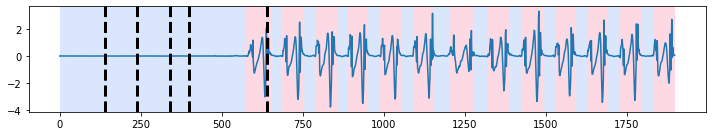

In [82]:
evaluate(cost, signals_train, bkps_train, "train", "window", data.left_steps.ravel().shape[0]-1)

#/!\Il faut commenter la ligne 14 de la fonction evaluate pour afficher le résultat !

test_hausdorff: 1488.000
test_f1: nan



/home/think/anaconda3/envs/Python37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/think/anaconda3/envs/Python37/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


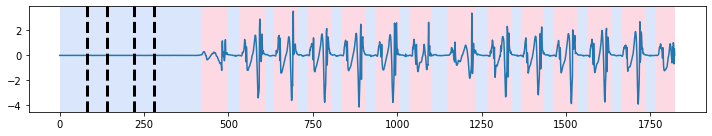

In [81]:
evaluate(cost, signals_test, bkps_test, "test", "window", test.left_steps.ravel().shape[0]-1)

#/!\Il faut commenter la ligne 14 de la fonction evaluate pour afficher le résultat !

train_hausdorff: 31.000
train_f1: 0.760



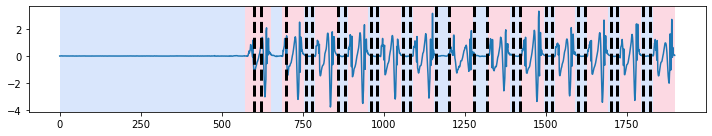

In [59]:
evaluate(cost, signals_train, bkps_train, "train", "dynp", data.left_steps.ravel().shape[0]-1)

test_hausdorff: 1068.000
test_f1: 0.222



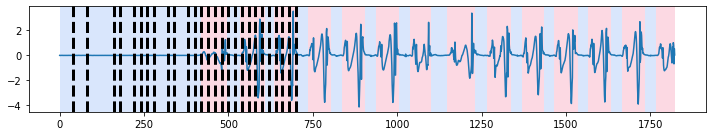

In [60]:
evaluate(cost, signals_test, bkps_test, "test", "dynp", test.left_steps.ravel().shape[0]-1)

## Unsupervised change point detection

In [61]:
costL2 = rpt.costs.CostL2

train_hausdorff: 413.000
train_f1: 0.129



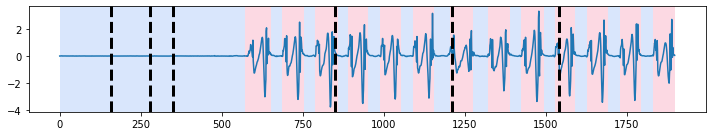

In [62]:
evaluate(costL2, signals_train, bkps_train, "train", "window", data.left_steps.ravel().shape[0]-1)

test_hausdorff: 199.000
test_f1: 0.326



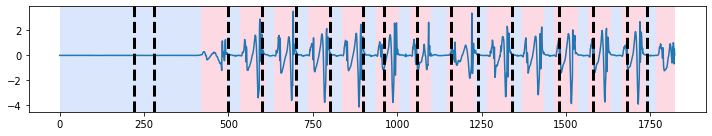

In [85]:
evaluate(costL2, signals_test, bkps_test, "test", "window", test.left_steps.ravel().shape[0]-1)

train_hausdorff: 150.000
train_f1: 0.440



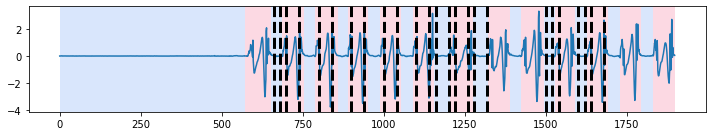

In [64]:
evaluate(costL2, signals_train, bkps_train, "train", "dynp", data.left_steps.ravel().shape[0]-1)

test_hausdorff: 241.000
test_f1: 0.407



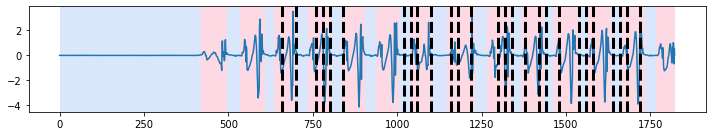

In [65]:
evaluate(costL2, signals_test, bkps_test, "test", "dynp", test.left_steps.ravel().shape[0]-1)

### Visualisation des métadonnées des 2 signaux étudiés

In [68]:
data.metadata

{'Subject': 3,
 'Trial': 2,
 'Code': '3-2',
 'Age': 18,
 'Gender': 'M',
 'Height': 1.79,
 'Weight': 60,
 'BMI': 18.7,
 'Laterality': 'Right',
 'Sensor': 'XSens',
 'WalkedDistance': 10,
 'WalkingSpeed': 2.7,
 'PathologyGroup': 'Healthy',
 'IsControl': 'Yes'}

In [69]:
test.metadata

{'Subject': 3,
 'Trial': 4,
 'Code': '3-4',
 'Age': 18,
 'Gender': 'M',
 'Height': 1.79,
 'Weight': 60,
 'BMI': 18.7,
 'Laterality': 'Right',
 'Sensor': 'XSens',
 'WalkedDistance': 10,
 'WalkingSpeed': 2.9,
 'PathologyGroup': 'Healthy',
 'IsControl': 'Yes'}